In this notebook, we try to find the circular pattern in Emulsion and IFT as observed by Lottie Cavanagh

In [216]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import math
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import LinearSegmentedColormap
from scipy import stats
import mpl_scatter_density
import seaborn as sns

In [6]:
# pre-process using PANDAS
area1_1 = pd.read_csv("chk_trks_area101_20220523.txt", sep='\s+', header=None)
area1_2 = pd.read_csv("chk_trks_area102_20220523.txt", sep='\s+', header=None)
area1_3 = pd.read_csv("chk_trks_area103_20220523.txt", sep='\s+', header=None)
area1_4 = pd.read_csv("chk_trks_area104_20220523.txt", sep='\s+', header=None)

combine = area1_1.append(area1_2, ignore_index=True)
combine = combine.append(area1_3, ignore_index=True)

emulsion = combine.append(area1_4, ignore_index=True)
emulsion.columns = ["t->ID", "plate_first", "plate_last", "x_first", "y_first", "z_first",
                    "x_last", "y_last", "z_last", 'tx_first', "ty_first", "tx_last",
                    "ty_last", "tx_pos", "ty_pos", "t->N()", "t->Npl()"]


In [7]:
emulsion

t->ID  plate_first  plate_last   x_first  y_first  z_first    x_last  \
0          132           11          19   26043.2   8075.4 -11683.5   25906.1   
1          520           11          16   60997.9   8332.4 -11683.5   60489.5   
2          975           11          16   25580.5   8922.4 -11683.5   24787.5   
3         1078           11          18   31538.1  10027.7 -11683.5   31220.8   
4         1133           11          20   36695.9  10097.6 -11683.5   36792.7   
...        ...          ...         ...       ...      ...      ...       ...   
201377  104635           11          20   99466.5  90050.3 -11773.0   99630.2   
201378  104637           11          20  107427.7  89505.0 -11773.0  107504.5   
201379  104639           11          20  111436.1  88992.8 -11773.0  111570.5   
201380  104725           11          20   89516.7  90156.7 -11773.0   89414.9   
201381  104749           11          20  111910.8  90073.3 -11773.0  111857.4   

         y_last  z_last  tx_first  ty_first  tx_last  ty_last  tx_pos  ty_pos  \
0       13061.3 -1275.5   -0.0196    0.4774  -0.0029   0.4746 -0.0132  0.4790   
1       10359.9 -5164.6   -0.0759    0.3108  -0.0784   0.3031 -0.0780  0.3110   
2       12273.8 -5164.6   -0.1229    0.5075  -0.1193   0.5103 -0.1216  0.5141   
3       10107.3 -2550.9   -0.0309    0.0139  -0.0326   0.0047 -0.0347  0.0087   
4       10195.3     0.0    0.0081    0.0095   0.0214   0.0106  0.0083  0.0084   
...         ...     ...       ...       ...      ...      ...     ...     ...   
201377  89909.1     0.0    0.0135   -0.0119   0.0133  -0.0105  0.0139 -0.0120   
201378  89421.5     0.0    0.0053   -0.0064   0.0077  -0.0092  0.0065 -0.0071   
201379  88849.8     0.0    0.0114   -0.0130   0.0114  -0.0101  0.0114 -0.0121   
201380  89955.5     0.0   -0.0074   -0.0164  -0.0103  -0.0217 -0.0086 -0.0171   
201381  89985.7     0.0   -0.0039   -0.0079  -0.0055  -0.0087 -0.0045 -0.0074   

        t->N()  t->Npl()  
0            8         9  
1            5         6  
2            5         6  
3            7         8  
4            9        10  
...        ...       ...  
201377      10        10  
201378       7        10  
201379       9        10  
201380       8        10  
201381       9        10  

[201382 rows x 17 columns]

In [16]:
all_x = pd.concat([emulsion['x_first'], emulsion['x_last']], axis=0)
all_y = pd.concat([emulsion['y_first'], emulsion['y_last']], axis=0)

In [68]:
emul_xy = (1/1000)*emulsion[['x_first','y_first','x_last','y_last']]

In [125]:
emul_xy_int = emul_xy.round(0).astype(int)

In [164]:
emul_xy_int

x_first  y_first  x_last  y_last
0            26        8      26      13
1            61        8      60      10
2            26        9      25      12
3            32       10      31      10
4            37       10      37      10
...         ...      ...     ...     ...
201377       99       90     100      90
201378      107       90     108      89
201379      111       89     112      89
201380       90       90      89      90
201381      112       90     112      90

[201382 rows x 4 columns]

In [252]:
len(emul_xy_int)*2

402764

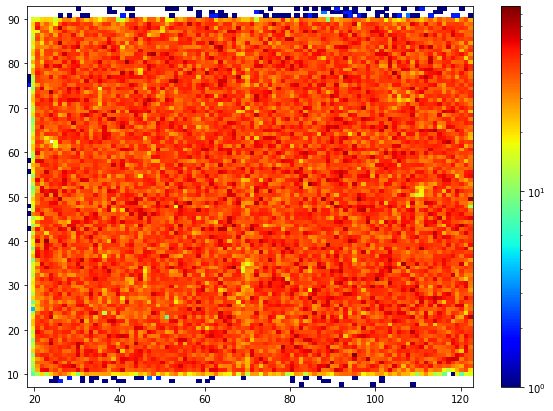

In [233]:
plt.figure(figsize=(10, 7))
plt.hist2d(all_x*(1/1000), all_y*(1/1000),bins=100, cmap=plt.cm.jet,norm=matplotlib.colors.LogNorm())
plt.colorbar()

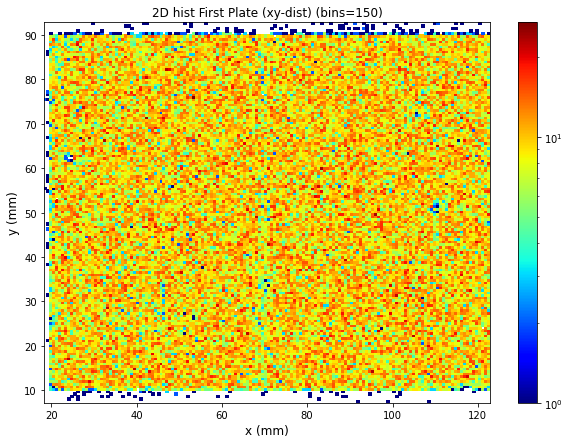

In [250]:
plt.figure(figsize=(10, 7))
plt.title("2D hist First Plate (xy-dist) (bins=150)",size=12)
plt.hist2d(emulsion['x_first']*(1/1000), emulsion['y_first']*(1/1000),bins=150, cmap=plt.cm.jet,norm=matplotlib.colors.LogNorm())
plt.xlabel('x (mm)',size=12)
plt.ylabel('y (mm)',size=12)
plt.colorbar()

In [194]:
col = np.array(range(16,125))  # x
col

array([ 16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124])

In [195]:
idx = np.array(range(5,98))  # y
len(idx)

93

In [196]:
emul_xy_int.iloc[0]['x_last']

26

In [214]:
test = data = pd.DataFrame(0, columns=col, index=idx)

In [215]:
import tqdm
for i in tqdm.trange(len(emul_xy_int)):
    x_first = emul_xy_int.iloc[i]['x_first']
    y_first = emul_xy_int.iloc[i]['y_first']
    test[x_first][y_first] += 1
    
    x_last = emul_xy_int.iloc[i]['x_last']
    y_last = emul_xy_int.iloc[i]['y_last']
    test[x_last][y_last] += 1
    
    

100%|████████████████████████████████████████████████████████████████████████| 201382/201382 [01:13<00:00, 2734.00it/s]


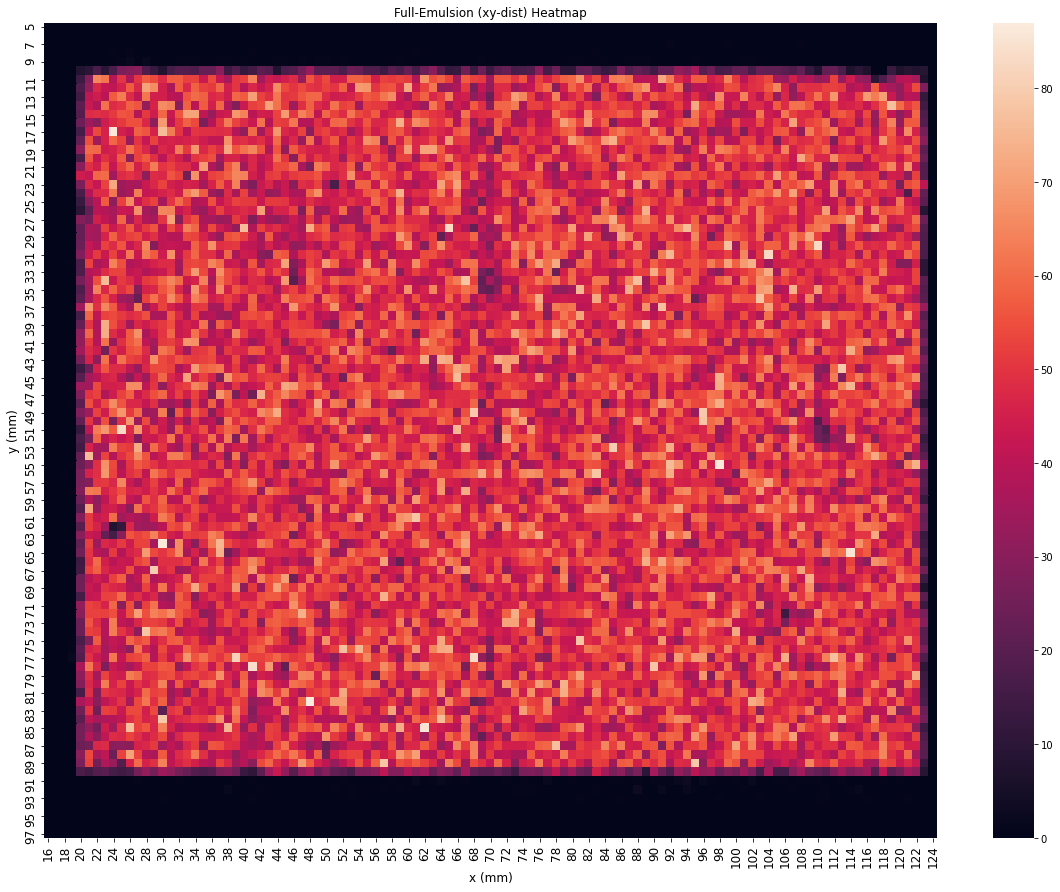

In [217]:
plt.figure(figsize=(20, 15))
ax.invert_yaxis()
ax = sns.heatmap(test, annot=False)
ax.set_xlabel('x (mm)', fontsize=12)
ax.set_ylabel('y (mm)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_title('Full-Emulsion (xy-dist) Heatmap', fontsize=12)
file_name = 'emlusionALL_HM.png'
plt.savefig(file_name,bbox_inches='tight',facecolor='w')

In [212]:
first_emul = data = pd.DataFrame(0, columns=col, index=idx)

In [218]:
for i in tqdm.trange(len(emul_xy_int)):
    x_first = emul_xy_int.iloc[i]['x_first']
    y_first = emul_xy_int.iloc[i]['y_first']
    first_emul[x_first][y_first] += 1

100%|████████████████████████████████████████████████████████████████████████| 201382/201382 [00:39<00:00, 5099.17it/s]


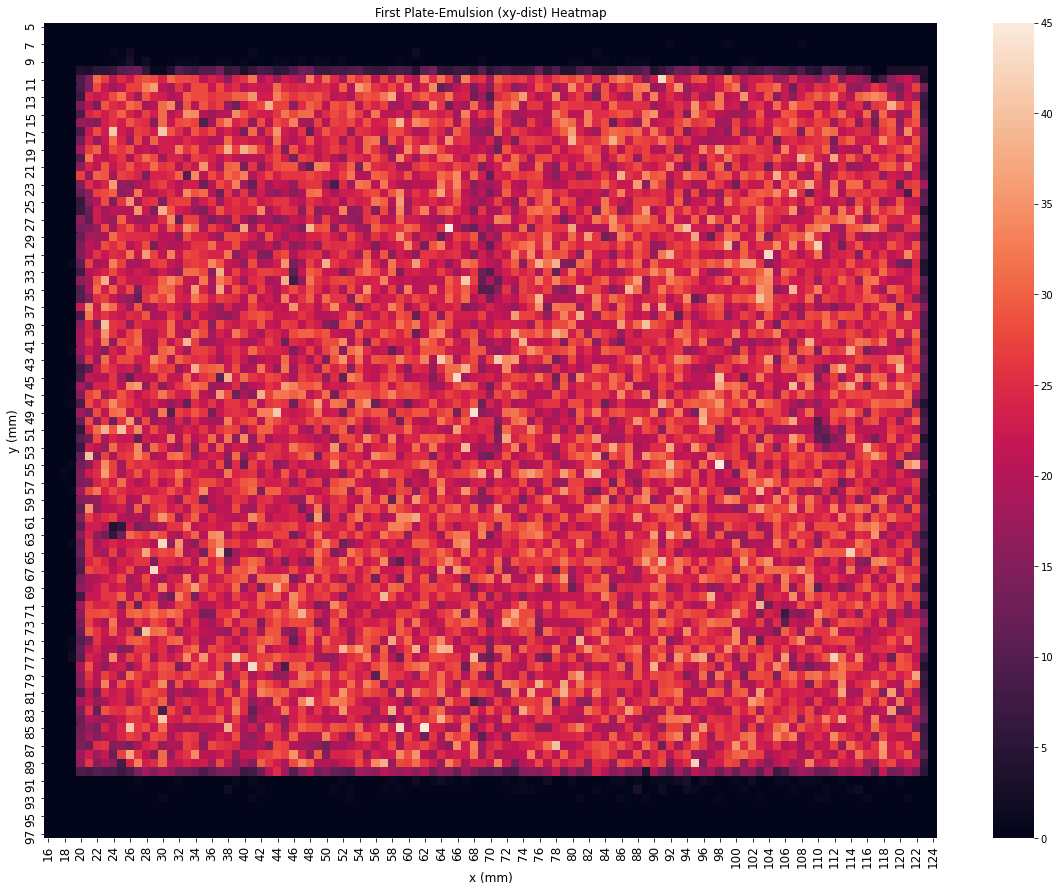

In [219]:
plt.figure(figsize=(20, 15))
ax.invert_yaxis()
ax = sns.heatmap(first_emul, annot=False)
ax.set_xlabel('x (mm)', fontsize=12)
ax.set_ylabel('y (mm)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_title('First Plate-Emulsion (xy-dist) Heatmap', fontsize=12)
file_name = 'emlusionFP_HM.png'
plt.savefig(file_name,bbox_inches='tight',facecolor='w')

In [220]:
last_emul = data = pd.DataFrame(0, columns=col, index=idx)

In [221]:
for i in tqdm.trange(len(emul_xy_int)):
    x_last = emul_xy_int.iloc[i]['x_last']
    y_last = emul_xy_int.iloc[i]['y_last']
    last_emul[x_last][y_last] += 1

100%|████████████████████████████████████████████████████████████████████████| 201382/201382 [00:44<00:00, 4489.99it/s]


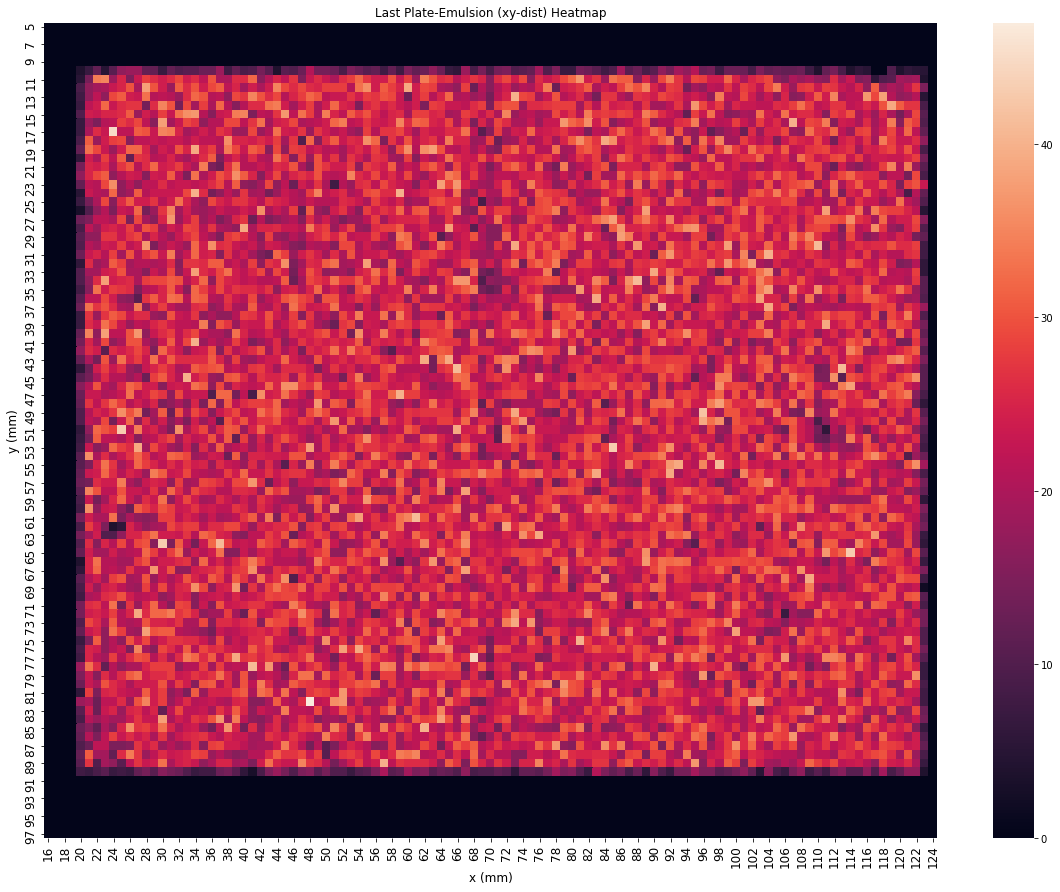

In [222]:
plt.figure(figsize=(20, 15))
ax.invert_yaxis()
ax = sns.heatmap(last_emul, annot=False)
ax.set_xlabel('x (mm)', fontsize=12)
ax.set_ylabel('y (mm)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_title('Last Plate-Emulsion (xy-dist) Heatmap', fontsize=12)
file_name = 'emlusionLP_HM.png'
plt.savefig(file_name,bbox_inches='tight',facecolor='w')